Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [3]:
len(df)

7043

## Initial data preparation

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Columns

The dataset contains the following columns:

- **CustomerID**: The ID of the customer  
- **Gender**: Male/Female  
- **SeniorCitizen**: Whether the customer is a senior citizen (0/1)  
- **Partner**: Whether they live with a partner (Yes/No)  
- **Dependents**: Whether they have dependents (Yes/No)  
- **Tenure**: Number of months since the start of the contract  
- **PhoneService**: Whether they have phone service (Yes/No)  
- **MultipleLines**: Whether they have multiple phone lines (Yes/No/No phone service)  
- **InternetService**: The type of internet service (No/Fiber/Optic)  
- **OnlineSecurity**: If online security is enabled (Yes/No/No internet)  
- **OnlineBackup**: If online backup service is enabled (Yes/No/No internet)  
- **DeviceProtection**: If the device protection service is enabled (Yes/No/No internet)  
- **TechSupport**: If the customer has tech support (Yes/No/No internet)  
- **StreamingTV**: If the TV streaming service is enabled (Yes/No/No internet)  
- **StreamingMovies**: If the movie streaming service is enabled (Yes/No/No internet)  
- **Contract**: The type of contract (Monthly/Yearly/Two years)  
- **PaperlessBilling**: If the billing is paperless (Yes/No)  
- **PaymentMethod**: Payment method (Electronic Check, Mailed Check, Bank Transfer, Credit Card)  
- **MonthlyCharges**: The amount charged monthly (Numeric)  
- **TotalCharges**: The total amount charged (Numeric)  
- **Churn**: If the client has canceled the contract (Yes/No)  


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- TotalCharges is not correctly
identified as a numeric type (float or int)
-  The reason is that in
some cases this column contains a space (“ ”) to represent a missing value. When coming across nonnumeric characters, Pandas has no other option but to declare the column “object.

---

In some cases, the **TotalCharges** column may be stored as a string instead of a numeric type due to formatting issues or missing values. We can force this column to be numeric by using Pandas' `to_numeric()` function.  

By default, `to_numeric()` raises an error when encountering non-numeric data (such as empty strings or spaces). However, we can handle these cases gracefully by specifying the `errors='coerce'` option. This replaces any non-numeric values with `NaN` (Not a Number), allowing for easier data cleaning and analysis.  

Here’s how to apply this transformation:  

```python
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
```

To verify that the dataset contains non-numeric values that were converted to `NaN`, we can use the `isnull()` function. This helps identify the specific rows where Pandas failed to parse the original string:  

```python
df[df['TotalCharges'].isnull()]
```

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.churn = (df.churn == 'yes').astype(int)

In [12]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [16]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [17]:
# Deletes the churn columns from both dataframes to 
# make sure we don’t accidentally use the churn variable 
# as a feature during training
del df_train['churn']
del df_val['churn']

## Exploratory data analysis

In [18]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

Here’s a clearer, more structured version with additional context:  

---

### Understanding Churn Rate  

The **churn rate** represents the proportion of customers who stop using a service over a given period. It is an essential metric for businesses to track customer retention and identify potential issues.  

We can calculate the churn rate by dividing the number of churned customers by the total number of customers:  

$
\frac{1521}{5634} = 0.27
$

This means that **27% of customers** in our dataset have churned, while the remaining 73% continue to use the service.  

### A More Efficient Way to Calculate Churn Rate  

Instead of manually computing the churn rate, we can use Pandas’ `mean()` method, which is a more convenient and scalable approach:  

```python
global_mean = df_train_full['Churn'].mean()
```

Since the **Churn** column is typically encoded as `1` for churned customers and `0` for retained customers, taking the mean directly gives the proportion of churned customers.  

### Why Does `mean()` Work?  
- In a binary column (`1 = churned`, `0 = not churned`), the mean is equivalent to:  

  $
  \frac{\text{sum of churned customers (1s)}}{\text{total customers}}
  $

- This approach is computationally efficient and works well on large datasets.  

In [20]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [21]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [22]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [23]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [24]:
female_mean / global_mean

1.0253955354648652

In [25]:
male_mean / global_mean

0.9749802969838747

In [26]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


- It means that clients with no partner are
more likely to churn than the ones with a partner

### Understanding **Risk Ratio**  

The **risk ratio** (also called **relative risk**) is a statistical measure that compares the probability of an event occurring in one group to the probability of it occurring in the overall population.  

In our case, the event is **churn**, and the risk ratio tells us how much more (or less) likely a specific group is to churn compared to the overall customer base.  

$
\text{Risk Ratio} = \frac{\text{Group Churn Rate}}{\text{Global Churn Rate}}
$

For example, if the churn rate among **female** customers is **27.7%**, while the global churn rate is **27%**, the risk ratio is:  

$
\frac{27.7\%}{27\%} = 1.02
$

### Interpreting the Risk Ratio:  
- **If the risk ratio is 1**, the group's churn rate is **equal** to the global churn rate.  
- **If the risk ratio > 1**, the group has a **higher risk** of churn compared to the overall population.  
- **If the risk ratio < 1**, the group has a **lower risk** of churn than the overall population.  

### Why Is This Useful?  
The risk ratio helps businesses **identify high-risk groups** and target interventions to **reduce churn**. If a specific segment (e.g., customers on a particular contract type) has a significantly higher risk ratio, companies can:  
- Offer better incentives (discounts, loyalty programs).  
- Improve customer support for at-risk groups.  
- Personalize marketing efforts to retain these customers.  

In [27]:
partner_yes / global_mean

0.7594724924338315

In [28]:
partner_no / global_mean

1.2216593879412643

 - Not surprisingly, it’s different for the partner
variable; having no partner is more risky

In [29]:
# Computes the AVG(churn)
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group

,mean
gender,
female,0.276824
male,0.263214


In [30]:
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [31]:
from IPython.display import display

In [32]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [33]:
for col in categorical:
    df_group = df_train_full.groupby(by=col)["churn"].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


### **Interpreting Risk Ratios Across Customer Segments**  

By explicitly calling the `display()` function, we can analyze the risk ratios for different categorical variables in the dataset. The results provide valuable insights into which groups are more or less likely to churn.  

#### **Key Observations**  

1. **Gender**  
   - There is **little to no difference** between males and females in terms of churn rate.  
   - The risk ratio for both groups is **close to 1**, meaning gender does not significantly influence churn.  

2. **Senior Citizens vs. Non-Seniors**  
   - **Senior citizens churn more** than younger customers.  
   - The risk ratio for seniors is **1.53**, indicating they are **53% more likely** to churn than the average customer.  
   - The risk for **non-seniors is 0.89**, meaning they churn **less frequently** than the overall population.  

3. **Having a Partner**  
   - Customers **with a partner churn less** than those without one.  
   - **Risk ratio:**
     - With a partner → **0.75** (lower risk of churn)  
     - Without a partner → **1.22** (higher risk of churn)  
   - This suggests that **social or financial stability** (e.g., shared contracts) might reduce churn.  

4. **Phone Service Usage**  
   - People who **use phone service** have a churn risk **close to 1**, meaning they behave similarly to the general population.  
   - Customers who **do not use phone service** have an even **lower risk** of churning, suggesting that phone service may not be a major factor influencing customer retention.  

---

### **Significant Differences in Churn Rates**  

Some categorical variables exhibit **substantial differences in churn risk** (as seen in Figure 3.18):  

1. **Tech Support**  
   - Customers **without tech support** churn **significantly more** than those who have it.  
   - This suggests that **technical assistance may improve customer satisfaction and retention**.  

2. **Contract Type**  
   - Customers with **monthly contracts** have the **highest churn rate**—they frequently cancel their subscriptions.  
   - Customers with **two-year contracts** churn **very rarely**, indicating that **long-term commitments lead to lower churn rates**.  

---

### **Why These Insights Matter**  
Understanding these risk ratios helps businesses:  
✔️ **Identify at-risk customer groups** and develop targeted retention strategies.  
✔️ **Improve services** (e.g., offering tech support or incentives for monthly users).  
✔️ **Encourage long-term commitments** by promoting yearly or two-year contracts.  

Would you like a **Python implementation** to compute and visualize these risk ratios? 🚀

In [34]:
from sklearn.metrics import mutual_info_score

### **Understanding Mutual Information (MI) in Feature Selection**  

When analyzing categorical variables, we often want to determine which features are **most important** for predicting the target variable (churn). Instead of just looking at group differences, we can use **mutual information (MI)**—a metric from **information theory**—to measure **how much knowing one variable tells us about another**.  

---

### **Why Mutual Information Matters**  

- If two variables are **dependent**, knowing one gives information about the other.  
- If a variable is **independent** of the target, it doesn’t contribute useful insights and can be removed.  
- **Higher MI values** indicate stronger relationships, meaning the variable is useful for prediction.  
- **Lower MI values** suggest no real dependency, making the variable a weak predictor.  

#### **Example:**  
- Customers with **month-to-month contracts** tend to churn more.  
- This strong dependency means that **contract type** has **high mutual information** with churn.  
- On the other hand, a variable like **customer ID** likely has an MI of **zero**, since it does not relate to churn at all.  

---

### **Using Mutual Information in Scikit-learn**  

Scikit-learn provides a built-in function to compute MI:  

```python
from sklearn.metrics import mutual_info_score

def calculate_mi(series): 
    return mutual_info_score(series, df_train_full['Churn']) 

# Apply MI calculation to all categorical variables
df_mi = df_train_full[categorical].apply(calculate_mi) 

# Sort results in descending order
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

# Display the most informative features
display(df_mi)
```

---

### **Interpreting the Results**  

- **High MI (Strong dependency)**  
  - **Contract Type** (e.g., month-to-month vs. yearly)  
  - **Tech Support** (customers without it churn more)  
  - **Online Services** (e.g., lack of security or backup increases churn risk)  

- **Low MI (Weak or no dependency)**  
  - **Gender** (little impact on churn)  
  - **Phone Service** (similar churn risk to global average)  
  - **Customer ID** (completely independent)  

---

### **Why This Matters for Machine Learning**  

✔️ **Improves model accuracy** by keeping only relevant features.  
✔️ **Reduces overfitting** by eliminating noise from irrelevant variables.  
✔️ **Enhances interpretability**, helping businesses focus on key drivers of churn.  


In [36]:
df_train_full[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
1814,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5946,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
3881,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
2389,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
3676,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5192,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
3980,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
235,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [35]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


- As we see, contract, onlinesecurity, and techsupport are among the most
important features. Indeed, we’ve already noted that contract and
techsupport are quite informative. It’s also not surprising that gender is among the
least important features, so we shouldn’t expect it to be useful for the model.

### **Understanding the Correlation Coefficient in Churn Analysis**  

While **mutual information (MI)** helps measure the **dependency between categorical features and churn**, it does **not** work for numerical variables. Instead, we use the **correlation coefficient** (also known as **Pearson’s correlation coefficient**) to assess relationships between **numerical variables** and the **binary target variable (Churn: 0 or 1)**.  

---

### **What the Correlation Coefficient Tells Us**  

The **correlation coefficient** is a value between **-1 and 1**, indicating the strength and direction of the relationship:  

- **Positive correlation (> 0)**  
  - When the numerical feature increases, churn **also increases**.  
  - Example: **Higher monthly charges** might be linked to a **higher churn rate**.  

- **Zero correlation (≈ 0)**  
  - No relationship between the variable and churn.  
  - Example: If **Tenure** had a correlation close to **0**, it wouldn’t be useful for predicting churn.  

- **Negative correlation (< 0)**  
  - When the numerical feature increases, churn **decreases**.  
  - Example: **Longer tenure (loyal customers)** may mean **lower churn**.  

---

### **Calculating Correlation in Pandas**  

We can quickly compute correlations between **numerical features** and **churn** using Pandas:  

```python
df_train_full[numerical].corrwith(df_train_full['Churn'])
```

This returns a correlation value for each numerical feature in the dataset.  

#### **Example Interpretation**  
| Feature          | Correlation with Churn |  
|-----------------|----------------------|  
| **MonthlyCharges** | **+0.20** (higher charges → higher churn) |  
| **TotalCharges**  | **-0.19** (more total charges → lower churn) |  
| **Tenure**        | **-0.35** (longer tenure → lower churn) |  

From this, we can see that:  
- **Tenure has the strongest negative correlation**, meaning **longer-term customers are less likely to churn**.  
- **Monthly charges show a weak positive correlation**, indicating that **higher bills may slightly increase churn risk**.  

---

### **Why This Matters for Machine Learning**  

✔️ **Identifies the most influential numerical features** for predicting churn.  
✔️ **Removes unimportant numerical variables** with near-zero correlation.  
✔️ **Helps feature engineering**, such as creating new variables (e.g., "high-risk customers" based on tenure).  

In [37]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [38]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


## One-hot encoding

### **Feature Engineering: Preparing Categorical Data for Machine Learning**  

Before training our model, we need to **transform categorical variables into numerical representations**. Machine learning models, such as **logistic regression**, cannot handle raw categorical data—only **numerical matrices**. This transformation process is known as **feature engineering**.

---

## **One-Hot Encoding for Categorical Variables**  

A common way to encode categorical data is **one-hot encoding** (OHE). This technique converts each **category into a separate binary column**, where:  
- **1 indicates the presence of a category (hot)**  
- **0 indicates its absence (cold)**  

### **Example: Encoding Contract Type**  
If the `Contract` column has three categories:  
- **Monthly**  
- **Yearly**  
- **Two-year**  

We create three **new columns**:  

| Contract Type | contract_monthly | contract_yearly | contract_two_year |  
|--------------|-----------------|----------------|-----------------|  
| Monthly      | **1** | 0 | 0 |  
| Yearly       | 0 | **1** | 0 |  
| Two-year     | 0 | 0 | **1** |  

A customer with a **yearly contract** will be encoded as **(0,1,0)**, while one with a **monthly contract** will be **(1,0,0)**.

---

## **Encoding Multiple Categorical Variables**  

Let’s say we also have a **Gender** variable with values **Female** and **Male**. Since gender has **two categories**, it requires **two binary columns**:  

| Gender  | gender_female | gender_male |  
|---------|--------------|-------------|  
| Female  | **1** | 0 |  
| Male    | 0 | **1** |  

If we combine both **Contract** and **Gender**, our final encoded dataset will have **5 new columns**:  

| Customer | gender_female | gender_male | contract_monthly | contract_yearly | contract_two_year |  
|----------|--------------|-------------|-----------------|----------------|-----------------|  
| A (Female, Yearly) | **1** | 0 | 0 | **1** | 0 |  
| B (Male, Monthly)  | 0 | **1** | **1** | 0 | 0 |  

---

## **Applying One-Hot Encoding in Pandas**  

Pandas provides a built-in function to **automate** this encoding process:  

```python
import pandas as pd 

# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df_train_full, columns=['Gender', 'Contract'], dtype=int)

# Display the first few rows
display(df_encoded.head())
```

By passing `columns=['Gender', 'Contract']`, we ensure that **only categorical variables** are transformed while keeping numerical variables unchanged.  

---

## **Avoiding the Dummy Variable Trap**  

One-hot encoding creates **extra columns**, which can introduce redundancy. For instance, in our **Gender** example, knowing the value of **one column (gender_female)** allows us to infer the value of the other (`gender_male`).  

To prevent **multicollinearity**, we typically **drop one column per category**:  

```python
df_encoded = pd.get_dummies(df_train_full, columns=['Gender', 'Contract'], drop_first=True, dtype=int)
```

Now, instead of 5 columns, we will have:  
- `gender_male` (1 for male, 0 for female)  
- `contract_yearly` (1 for yearly, 0 otherwise)  
- `contract_two_year` (1 for two-year, 0 otherwise)  

The **monthly contract is the baseline** (implicitly encoded as `0,0`).  

---

### **Why One-Hot Encoding Matters for Machine Learning**  

✔ **Ensures models can process categorical data** in numerical format.  
✔ **Prevents losing categorical information** while making data model-friendly.  
✔ **Improves interpretability**, as features remain **human-readable**.  

Now that we’ve transformed our categorical variables, we’re **ready to train our logistic regression model**! 🚀 Would you like to explore **feature scaling** next?

In [40]:
#  DictVectorizer takes in a dictionary and vectorizes it — that is, it creates vectors from it. 
# Then the vectors are put together as rows of one matrix.
# This matrix is used as input to a machine learning algorithm
from sklearn.feature_extraction import DictVectorizer

In [41]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [42]:
train_dict[2]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 46,
 'monthlycharges': 45.2,
 'totalcharges': 2065.15}

___
This line of code is using **`DictVectorizer`** from `sklearn.feature_extraction` to transform the list of dictionaries (`train_dict`) into a numerical feature matrix. Let's break it down:  

---

### **Code Breakdown**
```python
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)  # Initialize DictVectorizer (returns dense array)
dv.fit(train_dict)  # Learn feature mappings from the data
```
- **`DictVectorizer`**: Converts a list of dictionaries (categorical & numerical data) into a structured NumPy array.
- **`sparse=False`**: Returns a dense NumPy array instead of a sparse matrix.
- **`fit(train_dict)`**: Learns the mapping of categorical and numerical features.

---

### **How It Works**
Assume `train_dict` looks like this:
```python
[
    {'Name': 'Alice', 'Age': 30, 'Salary': 50000},
    {'Name': 'Bob', 'Age': 25, 'Salary': 60000}
]
```
After `fit()`, the **DictVectorizer**:
- **Encodes categorical variables** using **one-hot encoding**.
- **Keeps numerical values** as they are.

---

### **Transforming Data**
After fitting, you can transform the original dictionaries into a numerical feature matrix:
```python
X = dv.transform(train_dict)
```
This will return:
```python
array([
    [1.0, 0.0, 30.0, 50000.0],  # Alice
    [0.0, 1.0, 25.0, 60000.0]   # Bob
])
```
- **One-hot encoding for "Name"** → `"Name=Alice"` → `[1.0, 0.0]`, `"Name=Bob"` → `[0.0, 1.0]`
- **Numerical values remain unchanged** → `"Age"`, `"Salary"`

---

### **When to Use `DictVectorizer`?**
- When working with **categorical and numerical** mixed data.
- When dealing with **dictionary-based datasets** (e.g., JSON-like structures).
- When you need **one-hot encoding** for categorical variables automatically.

In [43]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [44]:
X_train = dv.transform(train_dict)

In [45]:
X_train.shape

(3774, 45)

In [46]:
len(dv.feature_names_)

45

## Training logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [49]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

### **Breaking Down Your Code**
```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)  
model.fit(X_train, y_train)  
model.predict_proba(X_val)  
```
This code trains a **logistic regression model** and predicts probabilities for validation data. Let's go step by step:

---

### **1️⃣ Initializing the Logistic Regression Model**
```python
model = LogisticRegression(solver='liblinear', random_state=1)
```
- **`solver='liblinear'`**:  
  - The optimization algorithm used to fit the model.  
  - `'liblinear'` is good for small-to-medium datasets and works well for **binary classification**.

- **`random_state=1`**:  
  - Ensures reproducibility by setting a fixed random seed.

---

### **2️⃣ Training the Model**
```python
model.fit(X_train, y_train)
```
- **`X_train`**: Feature matrix (numerical representation of training data).  
- **`y_train`**: Target labels (0 or 1 for binary classification).  
- The model learns weights for each feature to separate the classes.

---

### **3️⃣ Predicting Probabilities**
```python
model.predict_proba(X_val)
```
- **Returns the probability** of each class for each validation sample.  
- **Output format**: A NumPy array where each row has **two values**:  
  - `P(class=0)` → Probability of belonging to class **0**  
  - `P(class=1)` → Probability of belonging to class **1**  

#### **Example**
If `X_val` contains 3 samples:
```python
array([
    [0.2, 0.8],  # 80% chance of class 1
    [0.6, 0.4],  # 40% chance of class 1
    [0.9, 0.1]   # 10% chance of class 1
])
```
- The second column (`[:, 1]`) contains the probability of class **1**.

---

### **✅ When to Use `predict_proba` vs. `predict`?**
- **`predict_proba(X)`** → Gives probability scores (useful for threshold tuning, ranking, etc.).
- **`predict(X)`** → Gives final class predictions (0 or 1), based on a default **0.5 threshold**.

#### **Example**
```python
y_pred = model.predict(X_val)  # Returns [1, 0, 0] based on threshold 0.5
```

---

In [50]:
model.predict_proba(X_val)

array([[0.76509203, 0.23490797],
       [0.73114243, 0.26885757],
       [0.68054933, 0.31945067],
       ...,
       [0.9427494 , 0.0572506 ],
       [0.38477113, 0.61522887],
       [0.93872737, 0.06127263]])

In [51]:
y_pred = model.predict_proba(X_val)[:, 1]

In [52]:
y_pred

array([0.23490797, 0.26885757, 0.31945067, ..., 0.0572506 , 0.61522887,
       0.06127263])

In [53]:
churn = y_pred > 0.5

In [54]:
(y_val == churn).mean()

0.8016129032258065

## Model interpretation

### **Understanding `model.intercept_[0]` in Logistic Regression**
When you run:
```python
model.intercept_[0]
```
you're accessing the **intercept (bias term)** of the trained logistic regression model.

---

### **What is the Intercept?**
- In logistic regression, the model learns the equation:

  $
  \text{logit}(p) = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
  $

  where:
  - $ w_1, w_2, ..., w_n $ are the learned weights (coefficients).
  - \( b \) is the **intercept** (bias term).
  - \( p \) is the predicted probability of the positive class.
  - $\text{logit}(p) = \ln \left( \frac{p}{1 - p} \right) $ is the **log-odds transformation**.

- `model.intercept_[0]` gives the learned **bias \( b \)**, which controls the decision boundary's position.

---

### **Example**
If:
```python
print(model.intercept_[0])
# Output: -1.5
```
- The model has a bias of **-1.5**.
- A more negative bias shifts the decision boundary **toward predicting class 0 more often**.
- A more positive bias favors class 1.

---

### **How to Interpret?**
- If **`intercept_` is very large positive**, the model predicts **class 1 more often**.
- If **`intercept_` is very large negative**, the model predicts **class 0 more often**.

---

In [55]:
model.intercept_[0]

-0.121988402285897

### **Understanding `dict(zip(dv.feature_names_, model.coef_[0].round(3)))`**  

This line of code helps you **interpret the logistic regression model's learned feature importance**. Let's break it down step by step:

---

### **1️⃣ Code Breakdown**
```python
dict(zip(dv.feature_names_, model.coef_[0].round(3)))
```
- `dv.feature_names_`:  
  - This comes from the `DictVectorizer` (`dv`) and contains the names of **all features** (after one-hot encoding for categorical variables).
  
- `model.coef_[0]`:  
  - This contains the learned **weights (coefficients)** for each feature.
  
- `.round(3)`:  
  - Rounds the coefficients to **three decimal places** for readability.
  
- `zip(dv.feature_names_, model.coef_[0].round(3))`:  
  - Creates **pairs of (feature_name, coefficient)**.
  
- `dict(...)`:  
  - Converts the pairs into a **dictionary**, making it easier to read.

---

### **2️⃣ Example**
#### **Assume `dv.feature_names_` contains:**
```python
['Age', 'Salary', 'Gender=Male', 'Gender=Female']
```
#### **And `model.coef_[0].round(3)` contains:**
```python
[0.02, 0.001, 0.5, -0.5]
```
#### **Then the output dictionary will be:**
```python
{
    'Age': 0.02,
    'Salary': 0.001,
    'Gender=Male': 0.5,
    'Gender=Female': -0.5
}
```

---

### **3️⃣ How to Interpret This?**
- **Positive coefficients** → Increase the probability of predicting **class 1**.
  - `Gender=Male: 0.5` → Being **Male** increases the likelihood of class **1**.
- **Negative coefficients** → Decrease the probability of predicting **class 1**.
  - `Gender=Female: -0.5` → Being **Female** makes class **0** more likely.
- **Smaller magnitude coefficients** mean the feature has **less impact**.
  - `Salary: 0.001` → Salary has a **very small effect** on predictions.
- **Larger magnitude coefficients** mean the feature is **more important**.
  - `Gender=Male: 0.5` → Gender plays a significant role in classification.

---

In [57]:
dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


C:\Users\kaveh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


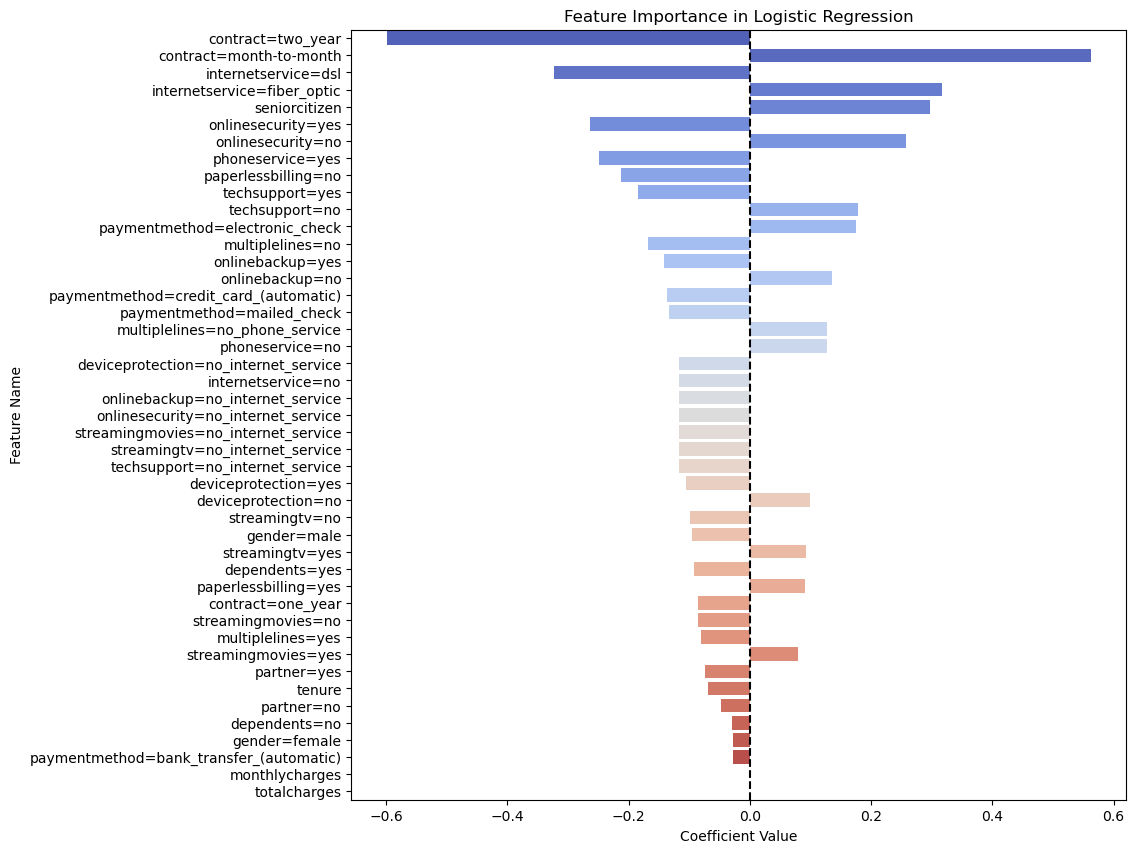

In [61]:
# Get feature names and their corresponding coefficients
feature_importance = dict(zip(dv.feature_names_, model.coef_[0].round(3)))

# Convert to sorted list for better visualization
features, coefficients = zip(*sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True))

# Ensure coefficients are a NumPy array
coefficients = np.array(coefficients)  # Convert to NumPy array

# Plot bar chart
plt.figure(figsize=(10, 10))
sns.barplot(x=coefficients, y=list(features), palette="coolwarm")

plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Logistic Regression")

plt.axvline(x=0, color="black", linestyle="--")  # Vertical line at zero for reference
plt.show()


## Using the model

In [62]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [63]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.07332403595205103

In [64]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [65]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [66]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321645264352351